In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadJson(path, file):
    f = open(path+file+".json", 'r')
    for line in f:
        jsonFile = json.loads(line)
    f.close()
    return jsonFile

In [3]:
def plotBaseline(ylabel, save, state, interval, m1, m2, m3, m4, m5, m6, m7, m8):
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    if state == "left":
        k = ['100', '200', '300', '400', '500']
        m1, m2, m3, m4, m5, m6, m7, m8 = m1[:5], m2[:5], m3[:5], m4[:5], m5[:5], m6[:5], m7[:5], m8[:5]
    elif state == "right":
        k = ['600', '700', '800', '900', '1000']
        m1, m2, m3, m4, m5, m6, m7, m8 = m1[5:], m2[5:], m3[5:], m4[5:], m5[5:], m6[5:], m7[5:], m8[5:]
    
    plt.figure(figsize=[10, 5], facecolor='whitesmoke', linewidth=10)
    
    title = 'Baseline'+r'('+interval+r')'
    plt.title(title)
    
    width = 0.05
    plt.bar([i-width*3 for i in range(len(k))], m1, color='#EA0000', label='LightGBM', width=width)
    plt.bar([i-width*2 for i in range(len(k))], m2, color='#00AEAE', label='xgboost', width=width)
    plt.bar([i-width*1 for i in range(len(k))], m3, color='#8F4586', label='RandomForest', width=width)
    plt.bar(k, m4, color='#F75000', label='CNN', width=width)
    plt.bar([i+width*1 for i in range(len(k))], m5, color='#00DB00', label='FC', width=width)
    plt.bar([i+width*2 for i in range(len(k))], m6, color='#D9B300', label='Essemble', width=width)
    plt.bar([i+width*3 for i in range(len(k))], m7, color='#FF00FF', label='SoftVoting', width=width)
    plt.bar([i+width*4 for i in range(len(k))], m8, color='#0080FF', label='HardVoting', width=width)

    plt.legend(loc='upper right')
    plt.xticks(k, rotation=0)
    plt.ylim(0, 1)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel('K', fontsize=14)
    if save:
        plt.savefig(title+r'_'+ylabel+r'('+state+r')'+r'.pdf', bbox_inches="tight")
    plt.show() 

In [4]:
def plotGraphMethod(ylabel, save, state, interval, m1, m2, m3, m4, m5):
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    
    if state == "left":
        k = ['100', '200', '300', '400', '500']
        m1, m2, m3, m4, m5 = m1[:5], m2[:5], m3[:5], m4[:5], m5[:5]
    elif state == "right":
        k = ['600', '700', '800', '900', '1000']
        m1, m2, m3, m4, m5 = m1[5:], m2[5:], m3[5:], m4[5:], m5[5:]
        
    plt.figure(figsize=[10, 5], facecolor='whitesmoke', linewidth=10)
    
    title = 'GNN-Method'+r'('+interval+r')'
    plt.title(title)

    width = 0.05
    plt.bar([i-width*2 for i in range(len(k))], m1, color='#0080FF', label='GCN', width=width)
    plt.bar([i-width*1 for i in range(len(k))], m2, color='#00AEAE', label='GAT', width=width)
    plt.bar(k, m3, color='#8F4586', label='TAGCN(K=1)', width=width)
    plt.bar([i+width*1 for i in range(len(k))], m4, color='#F75000', label='TAGCN(K=2)', width=width)
    plt.bar([i+width*2 for i in range(len(k))], m5, color='#00DB00', label='TAGCN(K=3)', width=width)
        
    plt.legend(loc='upper right')
    plt.xticks(k, rotation=0)
    plt.ylim(0, 1)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel('K', fontsize=14)
    if save:
        plt.savefig(title+r'_'+ylabel+r'('+state+r')'+r'.pdf', bbox_inches="tight")
    plt.show() 

In [5]:
def showBaseline(metric, interval, save, state):
    LightGBM_Path = r'./' + metric + r'/' + interval + r'/LightGBM.npy'
    xgboost_Path = r'./' + metric + r'/' + interval + r'/xgboost.npy'
    RF_Path = r'./' + metric + r'/' + interval + r'/RandomForest.npy'
    CNN_Path = r'./' + metric + r'/' + interval + r'/CNN.npy'
    FC_Path = r'./' + metric + r'/' + interval + r'/FC.npy'
    ensemble_Path = r'./' + metric + r'/' + interval + r'/Ensemble.npy'
    soft_Path = r'./' + metric + r'/' + interval + r'/SoftVoting.npy'
    hard_Path = r'./' + metric + r'/' + interval + r'/HardVoting.npy'
    
    LightGBM = np.load(LightGBM_Path)
    xgboost = np.load(xgboost_Path)
    RF = np.load(RF_Path)
    CNN = np.load(CNN_Path)
    FC = np.load(FC_Path)
    ensemble = np.load(ensemble_Path)
    soft = np.load(soft_Path)
    hard = np.load(hard_Path)
    
    if metric == "F1score(SuspectValue)":
        ylabel = "F1score"
    elif metric == "recall(SuspectValue)":
        ylabel = "Recall"
    elif metric == "precision(SuspectValue)":
        ylabel = "Precision"
    
    if interval == "0%-10%":
        interval = "0%-9%"
    elif interval == "10%-20%":
        interval = "10%-19%"
    elif interval == "20%-30%":
        interval = "20%-29%"
    
    plotBaseline(ylabel, save, state, interval, LightGBM, xgboost, RF, CNN, FC, ensemble, soft, hard)

In [6]:
def showGraph(metric, interval, save, state):
    GCN_Path = r'./' + metric + r'/' + interval + r'/' + r'/GCN.npy'
    GATC_Path = r'./' + metric + r'/' + interval + r'/' + r'/GATC.npy'
    TAGCN1_Path = r'./' + metric + r'/' + interval + r'/' + r'/TAGCN(K=1).npy'
    TAGCN2_Path = r'./' + metric + r'/' + interval + r'/' + r'/TAGCN(K=2).npy'
    TAGCN3_Path = r'./' + metric + r'/' + interval + r'/' + r'/TAGCN(K=3).npy'

    GCN = np.load(GCN_Path)
    GATC = np.load(GATC_Path)
    TAGCN1 = np.load(TAGCN1_Path)
    TAGCN2 = np.load(TAGCN2_Path)
    TAGCN3 = np.load(TAGCN3_Path)
    
    if metric == "F1score(SuspectValue)":
        ylabel = "F1score"
    elif metric == "recall(SuspectValue)":
        ylabel = "Recall"
    elif metric == "precision(SuspectValue)":
        ylabel = "Precision"
    
    if interval == "0%-10%":
        interval = "0%-9%"
    elif interval == "10%-20%":
        interval = "10%-19%"
    elif interval == "20%-30%":
        interval = "20%-29%"
    
    plotGraphMethod(ylabel, save, state, interval, GCN, GATC, TAGCN1, TAGCN2, TAGCN3)

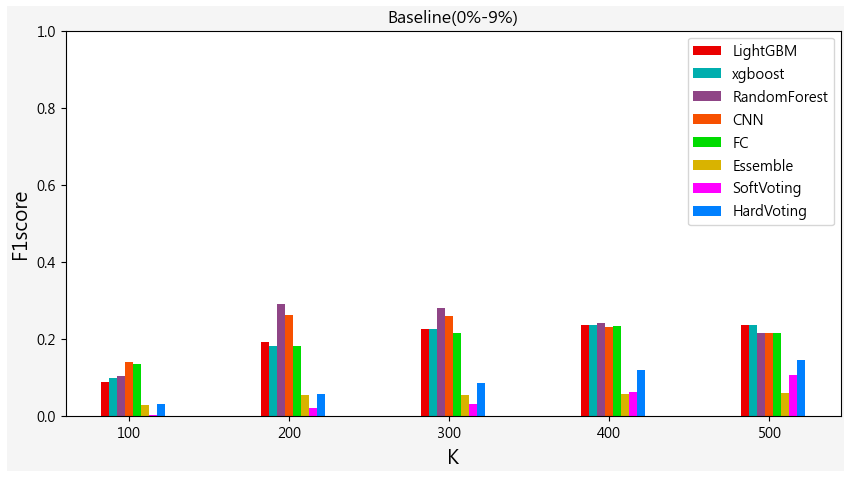

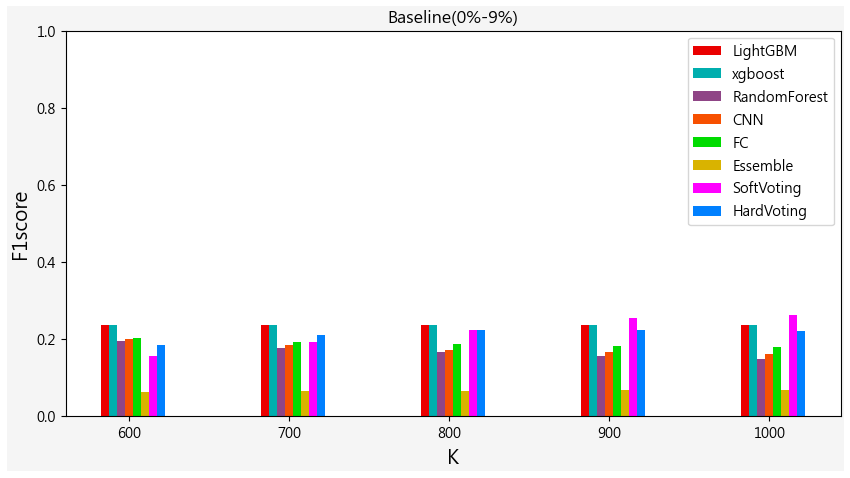

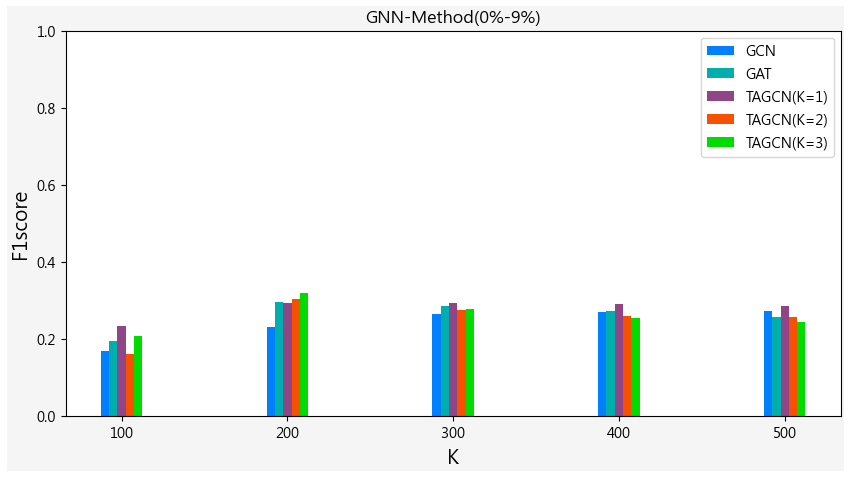

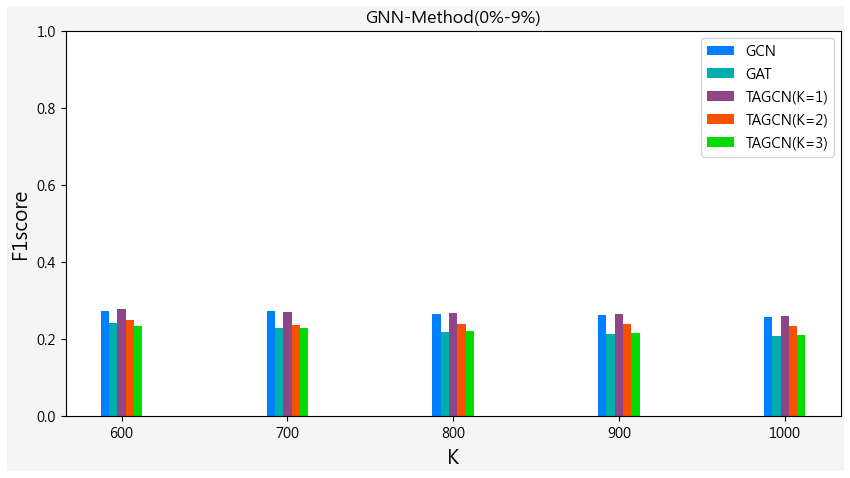

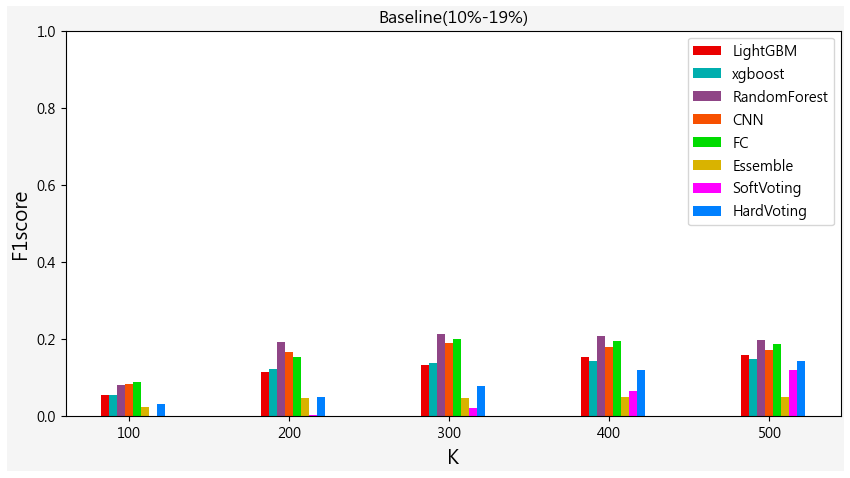

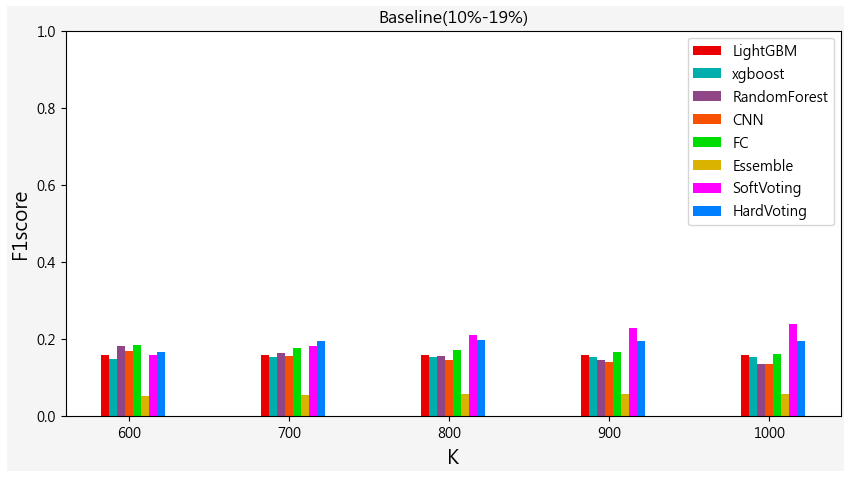

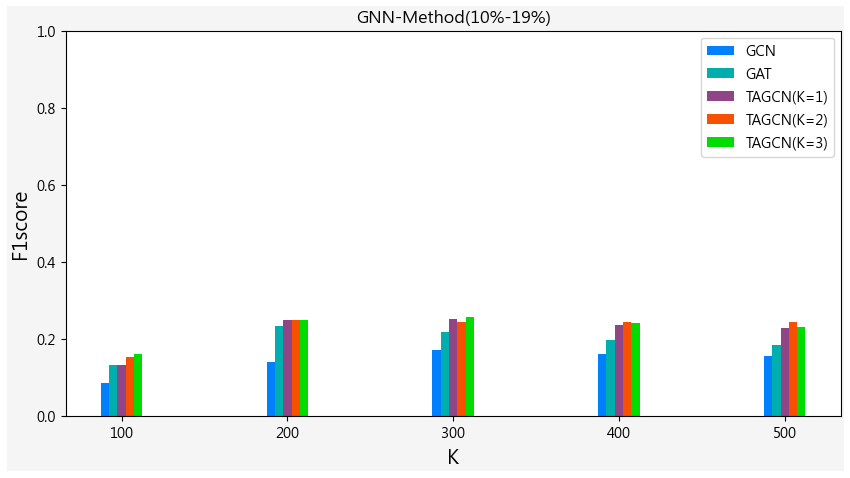

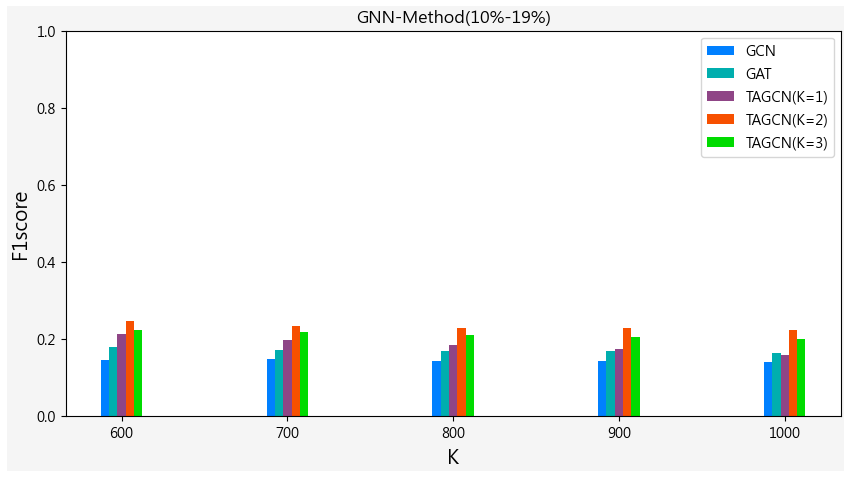

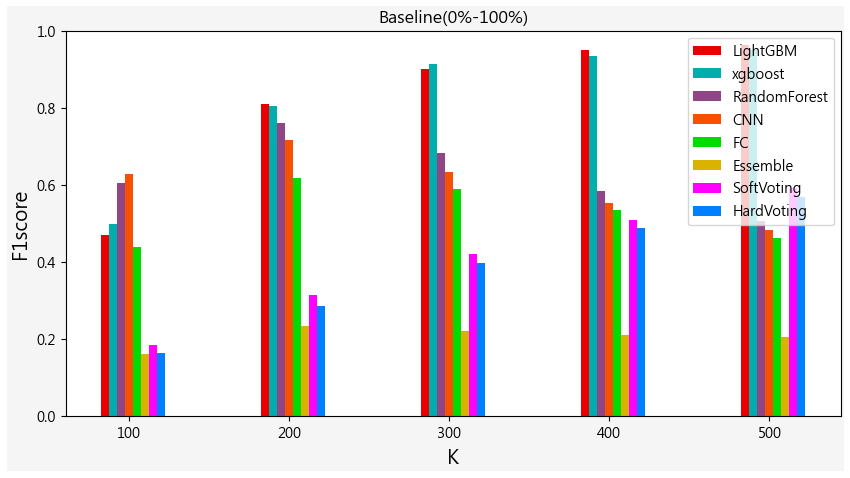

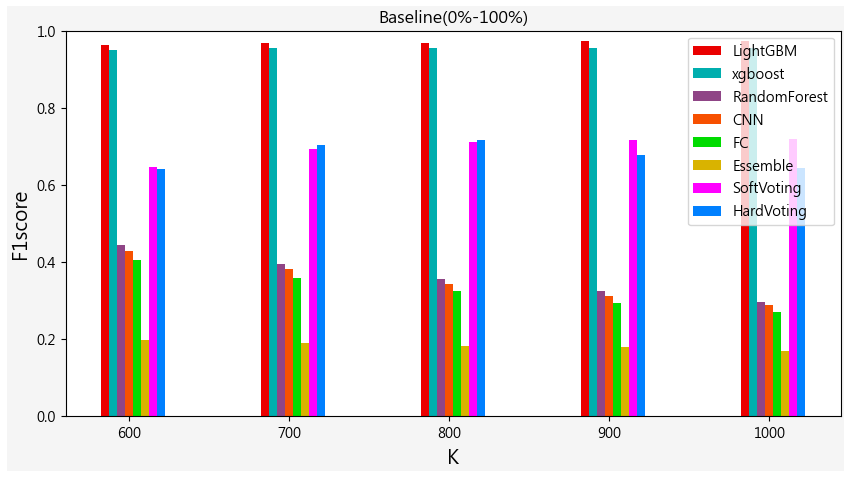

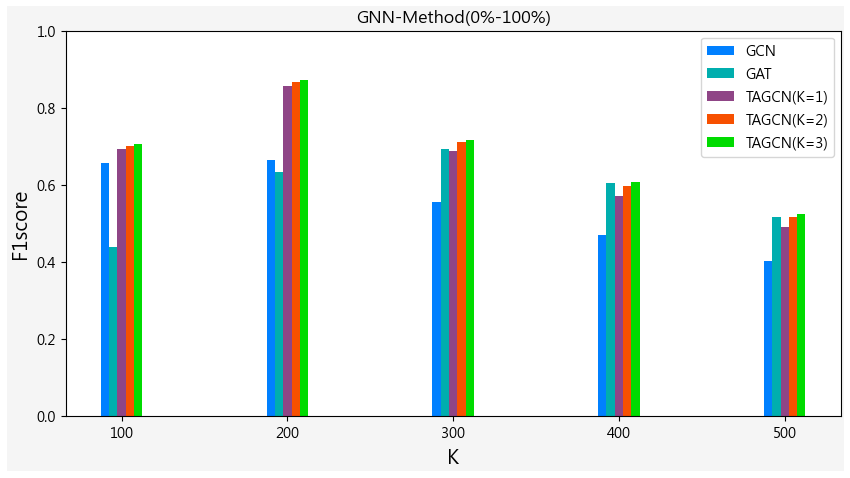

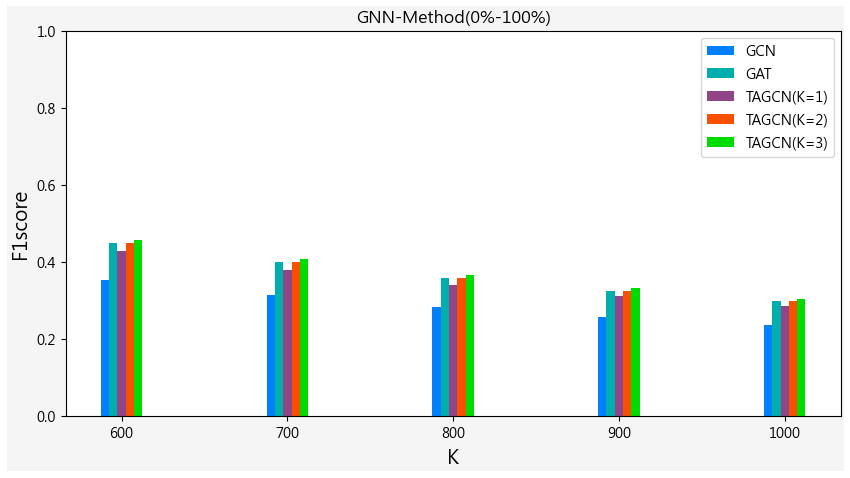

In [7]:
_save = False
_intervals = {1:"0%-10%", 2:"10%-20%", 4:"0%-100%"}
_metric = "F1score(SuspectValue)"
# _metric = "recall(SuspectValue)"
# _metric = "precision(SuspectValue)"
# _interval = _intervals[1]
for i in _intervals:
    _interval = _intervals[i]
    showBaseline(_metric, _interval, _save, "left")
    showBaseline(_metric, _interval, _save, "right")
    showGraph(_metric, _interval, _save, "left")
    showGraph(_metric, _interval, _save, "right")